In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses 
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('titanic_train.csv')
testing_set = training_set[:400]
training_set.drop(training_set.tail(400).index,
        inplace = True)

In [23]:
x_train = training_set.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y_train = training_set['Survived']


x_test = testing_set.drop(['PassengerId','Name','Ticket', 'Survived'], axis=1)
y_test = testing_set['Survived']

x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].median())

x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [4]:

def simplify_ages(df):
    df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['Age'], bins, labels=group_names)
    df['Age'] = categories.cat.codes 
    return df

def simplify_cabins(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    df['Cabin'] =  pd.Categorical(df['Cabin'])
    df['Cabin'] = df['Cabin'].cat.codes 
    return df

def simplify_fares(df):
    df['Fare'] = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df['Fare'], bins, labels=group_names)
    df['Fare'] = categories.cat.codes 
    return df

def simplify_sex(df):
    df['Sex'] = pd.Categorical(df['Sex'])
    df['Sex'] = df['Sex'].cat.codes 
    return df

def simplify_embarked(df):
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df['Embarked'] = df['Embarked'].cat.codes + 1
    return df

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = simplify_sex(df)
    df = simplify_embarked(df)
    return df


In [5]:
transform_features(x_train)
transform_features(x_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,4,1,0,1,7,3
1,1,0,6,1,0,4,2,1
2,3,0,5,0,0,1,7,3
3,1,0,5,1,0,4,2,3
4,3,1,5,0,0,2,7,3
...,...,...,...,...,...,...,...,...
395,3,1,4,0,0,1,7,3
396,3,0,5,0,0,1,7,3
397,2,1,6,0,0,3,7,3
398,2,1,4,0,0,2,7,3


In [6]:
model = models.Sequential()
model.add(layers.Dense(79, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(38, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(38, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer=optimizers.Adam(lr = 0.0005),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [8]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

validation_size = 50

x_val = x_train[:validation_size]
partial_x_train = x_train[validation_size:]

y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
14/14 [==============================] - 1s 43ms/step - loss: 0.6914 - binary_accuracy: 0.5259 - val_loss: 0.6938 - val_binary_accuracy: 0.5600
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6561 - binary_accuracy: 0.6485 - val_loss: 0.6899 - val_binary_accuracy: 0.5600
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6359 - binary_accuracy: 0.6402 - val_loss: 0.6865 - val_binary_accuracy: 0.5600
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6527 - binary_accuracy: 0.6059 - val_loss: 0.6817 - val_binary_accuracy: 0.5600
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6433 - binary_accuracy: 0.6185 - val_loss: 0.6795 - val_binary_accuracy: 0.5600
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6296 - binary_accuracy: 0.6413 - val_loss: 0.6762 - val_binary_accuracy: 0.6000
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - lo

14/14 [==============================] - 0s 3ms/step - loss: 0.4293 - binary_accuracy: 0.8172 - val_loss: 0.5201 - val_binary_accuracy: 0.7600
Epoch 54/200
14/14 [==============================] - 0s 4ms/step - loss: 0.5090 - binary_accuracy: 0.7663 - val_loss: 0.5161 - val_binary_accuracy: 0.7600
Epoch 55/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4331 - binary_accuracy: 0.8154 - val_loss: 0.5252 - val_binary_accuracy: 0.7600
Epoch 56/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4316 - binary_accuracy: 0.8266 - val_loss: 0.5239 - val_binary_accuracy: 0.7600
Epoch 57/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4526 - binary_accuracy: 0.8182 - val_loss: 0.5228 - val_binary_accuracy: 0.7600
Epoch 58/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4581 - binary_accuracy: 0.8100 - val_loss: 0.5182 - val_binary_accuracy: 0.7600
Epoch 59/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4

14/14 [==============================] - 0s 4ms/step - loss: 0.4094 - binary_accuracy: 0.8357 - val_loss: 0.5068 - val_binary_accuracy: 0.7600
Epoch 106/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4045 - binary_accuracy: 0.8458 - val_loss: 0.5025 - val_binary_accuracy: 0.7600
Epoch 107/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3839 - binary_accuracy: 0.8390 - val_loss: 0.5088 - val_binary_accuracy: 0.7800
Epoch 108/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4124 - binary_accuracy: 0.8207 - val_loss: 0.5215 - val_binary_accuracy: 0.7800
Epoch 109/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4016 - binary_accuracy: 0.8479 - val_loss: 0.4983 - val_binary_accuracy: 0.7600
Epoch 110/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4106 - binary_accuracy: 0.8291 - val_loss: 0.5093 - val_binary_accuracy: 0.7600
Epoch 111/200
14/14 [==============================] - 0s 4ms/step - los

14/14 [==============================] - 0s 4ms/step - loss: 0.4032 - binary_accuracy: 0.8387 - val_loss: 0.5209 - val_binary_accuracy: 0.7600
Epoch 158/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3665 - binary_accuracy: 0.8633 - val_loss: 0.5103 - val_binary_accuracy: 0.7600
Epoch 159/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3290 - binary_accuracy: 0.8734 - val_loss: 0.5247 - val_binary_accuracy: 0.7600
Epoch 160/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4155 - binary_accuracy: 0.8329 - val_loss: 0.5266 - val_binary_accuracy: 0.7600
Epoch 161/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4112 - binary_accuracy: 0.8209 - val_loss: 0.5258 - val_binary_accuracy: 0.7600
Epoch 162/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3870 - binary_accuracy: 0.8428 - val_loss: 0.5303 - val_binary_accuracy: 0.7600
Epoch 163/200
14/14 [==============================] - 0s 4ms/step - los

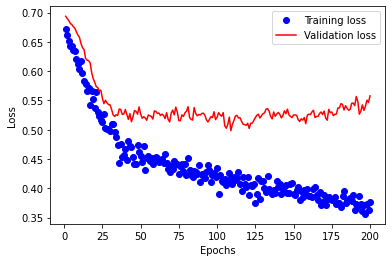

In [10]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

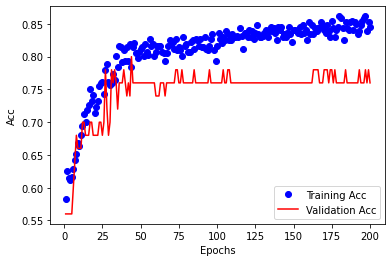

In [11]:
plt.clf()

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'r', label='Validation Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

In [16]:


predictions = model.predict_classes(x_test)
x_test


array([[3, 1, 4, ..., 1, 7, 3],
       [1, 0, 6, ..., 4, 2, 1],
       [3, 0, 5, ..., 1, 7, 3],
       ...,
       [2, 1, 6, ..., 3, 7, 3],
       [2, 1, 4, ..., 2, 7, 3],
       [2, 0, 5, ..., 2, 7, 3]])

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       243
           1       0.94      0.82      0.88       157

    accuracy                           0.91       400
   macro avg       0.92      0.89      0.90       400
weighted avg       0.91      0.91      0.91       400



In [24]:

my_passenger = np.array([[3,1,4,1,0,1,7,3]])

df2 = pd.DataFrame(my_passenger, columns = ['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Cabin','Embarked'])

predict = model.predict_classes(df2)

/Users/laurenfisher/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
predict

array([[0]], dtype=int32)